# Test notebook 
Trying to develop a ROI finder 
Currently testing using the Haxby dataset

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import feature
from skimage import measure 

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map, show

import pandas as pd

from sklearn.svm import SVC


%autosave 5
%matplotlib inline


Autosaving every 5 seconds


## Example from nilearn
https://nilearn.github.io/auto_examples/plot_decoding_tutorial.html#sphx-glr-auto-examples-plot-decoding-tutorial-py

### Getting example data

In [5]:
# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()
# 'func' is a list of filenames: one for each subject
fmri_filename = haxby_dataset.func[0]

# print basic information on the dataset
print('First subject functional nifti images (4D) are at: %s' %
      fmri_filename)  # 4D data

First subject functional nifti images (4D) are at: /Users/gracer/nilearn_data/haxby2001/subj2/bold.nii.gz


### Converting the fMRI to matrix

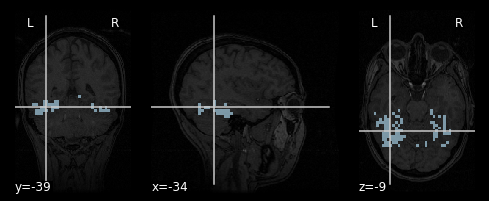

In [6]:
mask_filename = haxby_dataset.mask_vt[0]

# Let's visualize it, using the subject's anatomical image as a
# background
plotting.plot_roi(mask_filename, bg_img=haxby_dataset.anat[0],
                 cmap='Paired')


In [150]:
masker = NiftiMasker(mask_img=mask_filename, standardize=True)

# We give the masker a filename and retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_filename)


In [151]:
# Load behavioral information
behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
conditions = behavioral['labels']
print(conditions)
condition_mask = conditions.isin(['face', 'rest'])

# We apply this mask in the sampe direction to restrict the
# classification to the face vs cat discrimination
fmri_masked = fmri_masked[condition_mask]


0           rest
1           rest
2           rest
3           rest
4           rest
5           rest
6       scissors
7       scissors
8       scissors
9       scissors
10      scissors
11      scissors
12      scissors
13      scissors
14      scissors
15          rest
16          rest
17          rest
18          rest
19          rest
20          rest
21          face
22          face
23          face
24          face
25          face
26          face
27          face
28          face
29          face
          ...   
1422        rest
1423         cat
1424         cat
1425         cat
1426         cat
1427         cat
1428         cat
1429         cat
1430         cat
1431         cat
1432        rest
1433        rest
1434        rest
1435        rest
1436        rest
1437    scissors
1438    scissors
1439    scissors
1440    scissors
1441    scissors
1442    scissors
1443    scissors
1444    scissors
1445    scissors
1446        rest
1447        rest
1448        rest
1449        re

In [152]:
print(fmri_masked.shape)

(696, 464)


In [153]:
conditions = conditions[condition_mask]
print(conditions.shape)


(696,)


In [154]:
svc = SVC(kernel='linear')
print(svc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [155]:
svc.fit(fmri_masked, conditions)
prediction = svc.predict(fmri_masked)


In [172]:
coef_ = svc.coef_
print(coef_)
np.amax(coef_)
np.mean(coef_)


[[ 5.75444536e-02  1.25336615e-02 -8.54929394e-03  3.07644635e-02
  -5.63311153e-03  3.50443814e-02  1.84656365e-02 -4.96870764e-02
   6.21987942e-02  5.00326532e-02  5.10564727e-02 -2.24958004e-03
   4.03958988e-02 -8.05575960e-03 -4.92338918e-02 -3.42241276e-02
  -1.78472429e-02 -6.48593313e-03  4.99783499e-03  3.95928705e-02
   3.42121916e-02 -1.75592098e-03  4.00671775e-02 -1.67669696e-02
  -1.61873657e-02  3.95833453e-03  1.17851550e-02  2.85792131e-02
  -3.84393224e-02 -1.01794935e-01 -5.26409742e-02  1.39236235e-02
  -6.37940118e-02 -1.46375739e-02  6.27517176e-02  8.44218999e-02
  -6.63731027e-03  2.58746837e-02  4.01914119e-02  2.21164639e-02
   1.31297656e-03 -5.01644348e-02  2.11189000e-02  7.97671209e-03
  -2.07443016e-02 -2.51298366e-02  4.06056310e-02  3.05166394e-03
  -5.53016787e-02 -4.07209258e-02 -1.01949092e-02 -6.40086476e-02
  -6.96612380e-03 -5.38411368e-02  5.89463397e-02  1.61484958e-02
   2.91956591e-02  7.33674584e-02  4.54883880e-03  3.99055322e-02
  -1.53283

-0.002680770746206955

In [157]:
coef_img = masker.inverse_transform(coef_)

In [169]:
coef_img

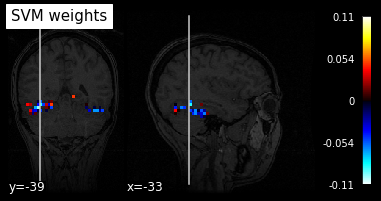

In [158]:
plot_stat_map(coef_img, bg_img=haxby_dataset.anat[0],
              title="SVM weights", display_mode="yx")

show()


In [173]:
from nilearn.image import load_img, math_img

mask = math_img('img < -0.0026', img=coef_img)


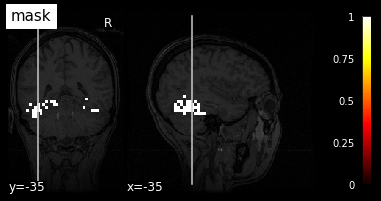

In [174]:
plot_stat_map(mask, bg_img=haxby_dataset.anat[0],
              title="mask", display_mode="yx")

show()


In [176]:
# We load data from nilearn by import datasets
from nilearn import datasets

# First, we fetch single subject specific data with haxby datasets: to have
# anatomical image, EPI images and masks images
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First subject anatomical nifti image (3D) located is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is located at: %s' %
      haxby_dataset.func[0])
print('Labels of haxby dataset (text file) is located at: %s' %
      haxby_dataset.session_target[0])

# Second, load the labels stored in a text file into array using pandas
import pandas as pd

session_target = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
# Now, we have the labels and will be useful while computing student's t-test
haxby_labels = session_target['labels']


First subject anatomical nifti image (3D) located is at: /Users/gracer/nilearn_data/haxby2001/subj2/anat.nii.gz
First subject functional nifti image (4D) is located at: /Users/gracer/nilearn_data/haxby2001/subj2/bold.nii.gz
Labels of haxby dataset (text file) is located at: /Users/gracer/nilearn_data/haxby2001/subj2/labels.txt


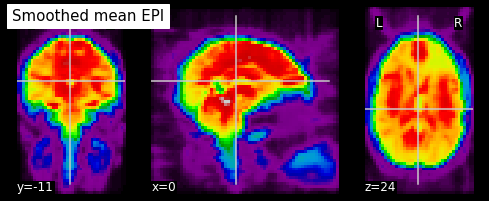

In [178]:
# Smooth the data using image processing module from nilearn
from nilearn import image

# Functional data
fmri_filename = haxby_dataset.func[0]
# smoothing: first argument as functional data filename and smoothing value
# (integer) in second argument. Output returns in Nifti image.
fmri_img = image.smooth_img(fmri_filename, fwhm=6)

# Visualize the mean of the smoothed EPI image using plotting function
# `plot_epi`
from nilearn.plotting import plot_epi

# First, compute the voxel-wise mean of smooth EPI image (first argument) using
# image processing module `image`
mean_img = image.mean_img(fmri_img)
# Second, we visualize the mean image with coordinates positioned manually
plot_epi(mean_img, title='Smoothed mean EPI')


In [179]:
fmri_data = fmri_img.get_data()
# number of voxels being x*y*z, samples in 4th dimension
print(fmri_data.shape)

(40, 64, 64, 1452)


## Checking that I can get the skimage to work

https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.watershed

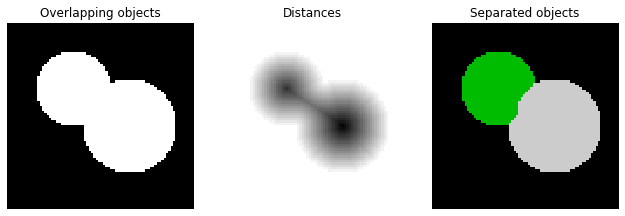

In [17]:
# Generate an initial 2D image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()


## 3D example

In [159]:
a=coef_

In [160]:
from skimage import data, img_as_float

im = img_as_float(a)
im

array([[ 5.75444536e-02,  1.25336615e-02, -8.54929394e-03,
         3.07644635e-02, -5.63311153e-03,  3.50443814e-02,
         1.84656365e-02, -4.96870764e-02,  6.21987942e-02,
         5.00326532e-02,  5.10564727e-02, -2.24958004e-03,
         4.03958988e-02, -8.05575960e-03, -4.92338918e-02,
        -3.42241276e-02, -1.78472429e-02, -6.48593313e-03,
         4.99783499e-03,  3.95928705e-02,  3.42121916e-02,
        -1.75592098e-03,  4.00671775e-02, -1.67669696e-02,
        -1.61873657e-02,  3.95833453e-03,  1.17851550e-02,
         2.85792131e-02, -3.84393224e-02, -1.01794935e-01,
        -5.26409742e-02,  1.39236235e-02, -6.37940118e-02,
        -1.46375739e-02,  6.27517176e-02,  8.44218999e-02,
        -6.63731027e-03,  2.58746837e-02,  4.01914119e-02,
         2.21164639e-02,  1.31297656e-03, -5.01644348e-02,
         2.11189000e-02,  7.97671209e-03, -2.07443016e-02,
        -2.51298366e-02,  4.06056310e-02,  3.05166394e-03,
        -5.53016787e-02, -4.07209258e-02, -1.01949092e-0

In [161]:
image_max = ndi.maximum_filter(im, size=.5, mode='nearest')
image_max

array([[ 5.75444536e-02,  1.25336615e-02, -8.54929394e-03,
         3.07644635e-02, -5.63311153e-03,  3.50443814e-02,
         1.84656365e-02, -4.96870764e-02,  6.21987942e-02,
         5.00326532e-02,  5.10564727e-02, -2.24958004e-03,
         4.03958988e-02, -8.05575960e-03, -4.92338918e-02,
        -3.42241276e-02, -1.78472429e-02, -6.48593313e-03,
         4.99783499e-03,  3.95928705e-02,  3.42121916e-02,
        -1.75592098e-03,  4.00671775e-02, -1.67669696e-02,
        -1.61873657e-02,  3.95833453e-03,  1.17851550e-02,
         2.85792131e-02, -3.84393224e-02, -1.01794935e-01,
        -5.26409742e-02,  1.39236235e-02, -6.37940118e-02,
        -1.46375739e-02,  6.27517176e-02,  8.44218999e-02,
        -6.63731027e-03,  2.58746837e-02,  4.01914119e-02,
         2.21164639e-02,  1.31297656e-03, -5.01644348e-02,
         2.11189000e-02,  7.97671209e-03, -2.07443016e-02,
        -2.51298366e-02,  4.06056310e-02,  3.05166394e-03,
        -5.53016787e-02, -4.07209258e-02, -1.01949092e-0

In [162]:
localMax = peak_local_max(im, indices=False, min_distance=1,
        threshold_abs=9,exclude_border=1)


In [163]:
localMax

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [164]:
localMax2 = feature.peak_local_max(im, indices=True, min_distance=1,
        threshold_abs=9,exclude_border=1)


In [165]:
localMax2

array([], shape=(0, 2), dtype=int64)

In [166]:
markers = ndi.label(localMax)[0]
labels = watershed(-im, markers)
regions=measure.regionprops(labels,intensity_image=a)

In [167]:
markers


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

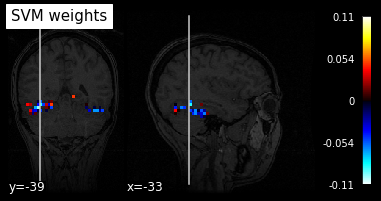

In [168]:
plot_stat_map(coef_img, bg_img=haxby_dataset.anat[0],
              title="SVM weights", display_mode="yx")

show()


In [121]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

im = img_as_float(a)
print(im)
# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=100, mode='nearest')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=100)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()


[[-4.66795032e-02 -1.72652247e-02 -3.89229210e-02 -3.64274008e-02
   4.21041793e-02  1.20133757e-02  1.42574130e-02 -5.67841625e-02
  -1.64282692e-02 -3.42682152e-02  1.17999625e-02 -1.06912808e-02
  -1.26745427e-02 -4.28759986e-02 -3.50471905e-02  2.59722458e-02
   6.68920900e-03 -1.64268120e-02  1.75227197e-02 -2.79410915e-03
   6.27505432e-02 -9.19680373e-02 -7.95905259e-02  2.00876301e-02
   5.43445300e-02 -2.66274540e-02 -1.47233083e-02  1.53091260e-02
  -1.36225841e-02  6.77731910e-02  1.95910873e-02 -9.56114357e-02
  -4.14614262e-04 -3.19645411e-02 -3.63623500e-02 -4.63764569e-02
   8.15352548e-03  1.08940086e-02 -3.56178382e-02 -2.36737552e-02
  -6.40633521e-02  1.97821392e-02  3.43203124e-02 -9.82512706e-03
  -2.61018392e-02  6.60749853e-02  3.00543580e-03  4.33694917e-02
  -1.41724126e-02  7.62017620e-02 -9.08555043e-04  2.11798261e-02
  -8.24215522e-03  4.27978084e-02 -4.48101044e-02 -1.21405743e-02
  -2.87324635e-02 -5.99272084e-02  4.92857678e-02 -1.61436750e-01
  -2.27799